# EDA

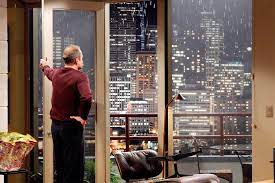

In [ ]:
# Summary of task
# Larry Sanders	
# Buyer	
# Waterfront
# limited budget
# nice & isolated but central neighborhood without kids (but got some of his own, just doesn't want his kids to play with other kids .. because of germs)

In [ ]:
#importing all libraries

import warnings

warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import plotly.express as px


from matplotlib.ticker import PercentFormatter
plt.rcParams.update({ "figure.figsize" : (8, 5),"axes.facecolor" : "white", "axes.edgecolor":  "black"})
plt.rcParams["figure.facecolor"]= "w"
pd.plotting.register_matplotlib_converters()
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [ ]:
# Data Import

df_eda= pd.read_csv('data/eda.csv')

In [61]:
df_eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21597 non-null  object 
 1   price          21597 non-null  float64
 2   id             21597 non-null  int64  
 3   bedrooms       21597 non-null  float64
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  float64
 6   sqft_lot       21597 non-null  float64
 7   floors         21597 non-null  float64
 8   waterfront     19206 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  float64
 13  sqft_basement  21145 non-null  float64
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17749 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [ ]:
# checking Dataset for null values
# many missing data in waterfront column

df_eda.isna().sum()

date                0
price               0
id                  0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2391
view               63
condition           0
grade               0
sqft_above          0
sqft_basement     452
yr_built            0
yr_renovated     3848
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [85]:
#Dataframe with Houses that are marked as waterfront

df_wf = df_eda.query('waterfront == 1')

In [11]:
df_wf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 146 entries, 49 to 21560
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           146 non-null    object 
 1   price          146 non-null    float64
 2   id             146 non-null    int64  
 3   bedrooms       146 non-null    float64
 4   bathrooms      146 non-null    float64
 5   sqft_living    146 non-null    float64
 6   sqft_lot       146 non-null    float64
 7   floors         146 non-null    float64
 8   waterfront     146 non-null    float64
 9   view           145 non-null    float64
 10  condition      146 non-null    int64  
 11  grade          146 non-null    int64  
 12  sqft_above     146 non-null    float64
 13  sqft_basement  142 non-null    float64
 14  yr_built       146 non-null    int64  
 15  yr_renovated   121 non-null    float64
 16  zipcode        146 non-null    int64  
 17  lat            146 non-null    float64
 18  long        

In [12]:
df_wf.describe()

,price,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,146.000,146.000,146.000,146.000,146.000,146.000,146.000,146.000,145.000,146.000,146.000,146.000,142.000,146.000,121.000,146.000,146.000,146.000,146.000,146.000
mean,1717214.726,4454968693.048,3.349,2.709,3244.753,25870.884,1.630,1.000,3.786,3.541,8.836,2508.760,748.979,1962.281,4766.281,98096.712,47.540,-122.278,2682.829,22893.699
std,1145384.857,2858044756.510,1.099,1.122,1652.135,44629.076,0.548,0.000,0.555,0.744,1.781,1283.720,809.892,27.119,8524.847,60.600,0.114,0.124,808.410,23264.086
min,285000.000,121029034.000,1.000,0.750,440.000,1989.000,1.000,1.000,1.000,1.000,5.000,440.000,0.000,1905.000,0.000,98004.000,47.328,-122.514,750.000,3230.000
25%,827500.000,2016368797.000,3.000,1.812,2082.500,11692.250,1.000,1.000,4.000,3.000,8.000,1565.000,0.000,1941.250,0.000,98040.000,47.453,-122.376,2075.000,11991.500
50%,1510000.000,3692779634.000,3.000,2.500,2900.000,17730.500,2.000,1.000,4.000,3.000,9.000,2200.000,580.000,1959.500,0.000,98075.000,47.548,-122.273,2695.000,16260.500
75%,2282500.000,7390450150.000,4.000,3.250,4117.500,26692.500,2.000,1.000,4.000,4.000,10.000,3220.000,1270.000,1984.750,0.000,98155.000,47.608,-122.210,3140.000,24537.500
max,7060000.000,9808700762.000,6.000,6.750,10040.000,505166.000,3.000,1.000,4.000,5.000,12.000,7680.000,4820.000,2014.000,20090.000,98199.000,47.773,-122.059,4913.000,192268.000


In [ ]:
#missing data in the Waterfront DF

df_wf.isna().sum()

date              0
price             0
id                0
bedrooms          0
bathrooms         0
sqft_living       0
sqft_lot          0
floors            0
waterfront        0
view              1
condition         0
grade             0
sqft_above        0
sqft_basement     4
yr_built          0
yr_renovated     25
zipcode           0
lat               0
long              0
sqft_living15     0
sqft_lot15        0
dtype: int64

In [ ]:
# Create a map for houses at waterfront
#center_lat = df_wf['lat'].mean()
#center_lon = df_wf['long'].mean()
#m = folium.Map(location=[center_lat, center_lon], zoom_start=12)

# Add markers to the map
#for _, row in df_wf.iterrows():
#    folium.Marker(
#        location=[row['lat'], row['long']],
#        popup=row['id']
#    ).add_to(m)

# Save the map to an HTML file
#m.save("data/waterfront_houses.html")

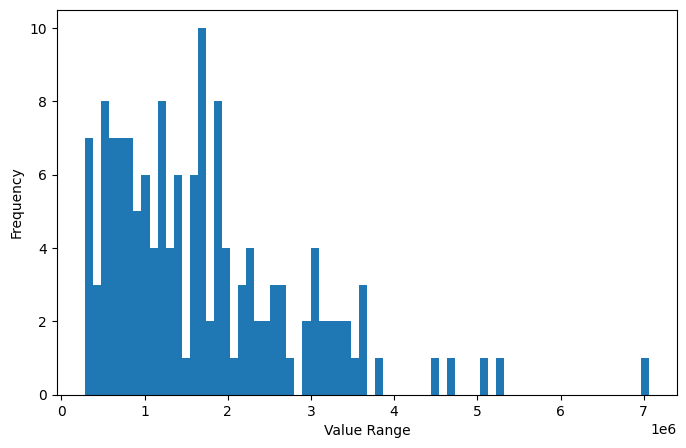

In [ ]:
# histogram for Prices in Waterfront Properties

plt.hist(df_wf['price'], bins=70)
plt.xlabel('Value Range')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# better look at houses below 2 mio Dollar

In [67]:
# Dataset houses below 2 mio Dollar with 3 or more bedrooms

df_wf_af2 = df_wf.query('price <= 2000000 and bedrooms >= 3')

In [ ]:
df_wf_af2.info()

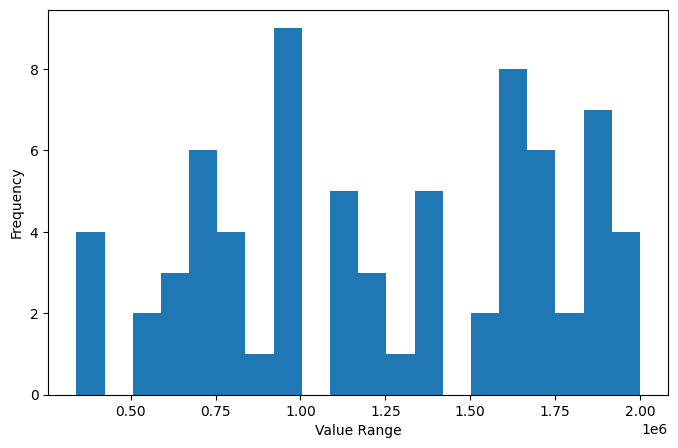

In [69]:
# Plot of houses below 2 mio Dollar with 3 or more bedrooms

plt.hist(df_wf_af2['price'], bins=20)
plt.xlabel('Value Range')
plt.ylabel('Frequency')
plt.show()

In [70]:
# Scatter cost below 2 mio / sqft living

#fig = px.scatter(df_wf_af2, x='price', y='sqft_living', 
#                 hover_data=['id', 'zipcode', 'bedrooms'])
#fig.show()

In [ ]:
#Dataframe with waterfront houses for 1 Mio Dollar or less with 3 or more bedrooms

df_wf_af = df_wf.query('price <= 1000000 and bedrooms >= 3')

In [75]:
df_wf_af.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29 entries, 457 to 19955
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           29 non-null     object 
 1   price          29 non-null     float64
 2   id             29 non-null     int64  
 3   bedrooms       29 non-null     float64
 4   bathrooms      29 non-null     float64
 5   sqft_living    29 non-null     float64
 6   sqft_lot       29 non-null     float64
 7   floors         29 non-null     float64
 8   waterfront     29 non-null     float64
 9   view           29 non-null     float64
 10  condition      29 non-null     int64  
 11  grade          29 non-null     int64  
 12  sqft_above     29 non-null     float64
 13  sqft_basement  28 non-null     float64
 14  yr_built       29 non-null     int64  
 15  yr_renovated   23 non-null     float64
 16  zipcode        29 non-null     int64  
 17  lat            29 non-null     float64
 18  long        

In [72]:
#fig = px.scatter(df_wf_af, x='price', y='sqft_living', 
#                 hover_data=['id', 'zipcode', 'bedrooms'])
#fig.show()

In [76]:
fig = px.scatter(df_wf_af, x='price', y='sqft_lot', 
                 hover_data=['id', 'zipcode', 'bedrooms'])
fig.show()

In [ ]:
# Bubbleplot for affordable houses

df_wf_af1 = df_wf_af

df_wf_af1['bedrooms'] = df_wf_af1['bedrooms'].astype(str)


fig = px.scatter(df_wf_af, x="price", y="sqft_lot",
	         size="sqft_living", color="bedrooms",
                 hover_name="id", log_x=True, size_max=60)
fig.show()

In [77]:
df_wf_af.describe()

,price,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,29.000,29.000,29.000,29.000,29.000,29.000,29.000,29.000,29.000,29.000,29.000,29.000,28.000,29.000,23.000,29.000,29.000,29.000,29.000,29.000
mean,745222.414,4710363688.276,3.552,2.397,2366.379,42951.172,1.534,1.000,3.655,3.483,7.862,1801.552,585.000,1958.000,3447.826,98137.069,47.446,-122.346,2167.931,31352.207
std,207221.226,2712658715.220,0.827,0.883,622.889,94299.116,0.550,0.000,0.721,0.634,0.953,579.669,492.826,23.809,7683.400,58.481,0.075,0.096,508.986,40544.403
min,340000.000,121039083.000,3.000,0.750,1200.000,1989.000,1.000,1.000,1.000,3.000,6.000,1120.000,0.000,1912.000,0.000,98006.000,47.331,-122.514,1170.000,3230.000
25%,635000.000,2623039018.000,3.000,1.750,1970.000,11834.000,1.000,1.000,4.000,3.000,7.000,1410.000,135.000,1948.000,0.000,98070.000,47.381,-122.378,1790.000,11476.000
50%,750000.000,3343301910.000,3.000,2.500,2340.000,17342.000,1.500,1.000,4.000,3.000,8.000,1600.000,500.000,1960.000,0.000,98166.000,47.454,-122.373,2200.000,16994.000
75%,949950.000,7567600030.000,4.000,2.750,2790.000,27144.000,2.000,1.000,4.000,4.000,8.000,2120.000,1012.500,1972.000,0.000,98178.000,47.500,-122.324,2400.000,31450.000
max,1000000.000,9536600010.000,6.000,4.500,4380.000,505166.000,3.000,1.000,4.000,5.000,10.000,3720.000,1430.000,2007.000,19910.000,98198.000,47.645,-122.084,3270.000,192268.000


In [37]:
df_wf1 = df_wf.query('price < 1000000 and bedrooms >= 3')

In [38]:
df_wf1.describe()

,price,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,28.000,28.000,28.000,28.000,28.000,28.000,28.000,28.000,28.000,28.000,28.000,28.000,27.000,28.000,22.000,28.000,28.000,28.000,28.000,28.000
mean,736123.214,4759187323.214,3.500,2.321,2375.179,44165.714,1.518,1.000,3.643,3.429,7.857,1790.179,606.667,1958.679,2712.273,98141.750,47.442,-122.351,2142.857,32152.500
std,205039.104,2749430120.861,0.793,0.799,632.481,95798.257,0.552,0.000,0.731,0.573,0.970,587.002,488.435,23.958,6986.369,53.737,0.073,0.094,499.754,41054.481
min,340000.000,121039083.000,3.000,0.750,1200.000,1989.000,1.000,1.000,1.000,3.000,6.000,1120.000,0.000,1912.000,0.000,98023.000,47.331,-122.514,1170.000,3230.000
25%,633500.000,2623036514.250,3.000,1.750,1967.500,12089.000,1.000,1.000,3.750,3.000,7.000,1407.500,190.000,1952.500,0.000,98073.000,47.380,-122.378,1787.500,11825.500
50%,750000.000,4170724613.000,3.000,2.500,2400.000,18117.000,1.500,1.000,4.000,3.000,8.000,1590.000,540.000,1960.500,0.000,98166.000,47.453,-122.374,2160.000,17153.500
75%,948112.500,7583500043.750,4.000,2.750,2792.500,28537.500,2.000,1.000,4.000,4.000,8.250,2048.750,1025.000,1973.000,0.000,98178.000,47.500,-122.324,2362.500,31743.750
max,999000.000,9536600010.000,6.000,4.500,4380.000,505166.000,3.000,1.000,4.000,5.000,10.000,3720.000,1430.000,2007.000,19910.000,98198.000,47.645,-122.084,3270.000,192268.000


In [ ]:
# Create a map for affordable houses at waterfront
center_lat = df_wf_af['lat'].mean()
center_lon = df_wf_af['long'].mean()
m = folium.Map(location=[center_lat, center_lon], zoom_start=12)

# Add markers to the map
for _, row in df_wf_af.iterrows():
    #popup_text = f"{row['id']}<br>Lat: {row['price']}<br>Long: {row['bedrooms']}"
    folium.Marker(
        location=[row['lat'], row['long']],
        popup=f"{row['id']}<br>Price: {row['price']}<br>Bedrooms: {row['bedrooms']}<br>Zipcode: {row['zipcode']}"
    ).add_to(m)

# Save the map to an HTML file
m.save("data/affordable_houses.html")

In [39]:
df_wf_af['zipcode'].unique()

array([98070, 98178, 98166, 98074, 98006, 98118, 98198, 98023, 98146])

In [ ]:
# Dataframe for Top 4 neighborhoods

df_wf_nh = df_wf_af.query('zipcode in (98070, 98166, 98118, 98178)')

In [ ]:
# Create a map for affordable houses at waterfront in good neighborrhoods
center_lat = df_wf_nh['lat'].mean()
center_lon = df_wf_nh['long'].mean()
m = folium.Map(location=[center_lat, center_lon], zoom_start=12)

# Add markers to the map
for _, row in df_wf_nh.iterrows():
    #popup_text = f"{row['id']}<br>Lat: {row['price']}<br>Long: {row['bedrooms']}"
    folium.Marker(
        location=[row['lat'], row['long']],
        popup=f"{row['id']}<br>Price: {row['price']}<br>Bedrooms: {row['bedrooms']}<br>Zipcode: {row['zipcode']}"
    ).add_to(m)

# Save the map to an HTML file
m.save("data/neighboorhoods_houses.html")


In [ ]:
# Dataframe for Vashon Island

df_vi = df_wf_nh.query('zipcode == 98070')

In [ ]:
# Bubbleplot for Vashon Island

df_vi['bedrooms'] = df_vi['bedrooms'].astype(str)

fig = px.scatter(df_vi, x="price", y="sqft_lot",
	         size="sqft_living", color="bedrooms",
                 hover_name="id", log_x=True, size_max=60)
fig.show()

In [65]:
# Dataframe cut out with data of interest for final descision

df_vi[['price','grade','bedrooms','bathrooms','sqft_living','yr_built','condition','yr_renovated']]

,price,grade,bedrooms,bathrooms,sqft_living,yr_built,condition,yr_renovated
457,705000.000,9,3,3.000,1970.000,1980,4,0.000
2962,999000.000,8,3,2.750,2830.000,1962,4,0.000
8270,400000.000,7,3,2.500,2090.000,1919,3,NaN
13564,635000.000,7,3,1.750,1940.000,1955,4,0.000
16556,340000.000,6,4,1.000,1200.000,1972,3,0.000
17138,750000.000,9,3,2.500,2960.000,1990,4,0.000


In [ ]:
# Dataset for Burien neighborhood

df_b = df_wf_nh.query('zipcode == 98166')

In [90]:
# Bubbleplot for Burien

df_b['bedrooms'] = df_b['bedrooms'].astype(str)

fig = px.scatter(df_b, x="price", y="sqft_lot",
	         size="sqft_living", color="bedrooms",
                 hover_name="id", log_x=True, size_max=60)
fig.show()

In [ ]:
# Dataset for Rainier Beach / Lakeridge neighborhood

df_rbl = df_wf_nh.query('zipcode == 98118 or zipcode == 98178')

In [91]:
# Bubbleplot for Burien

df_rbl['bedrooms'] = df_rbl['bedrooms'].astype(str)

fig = px.scatter(df_rbl, x="price", y="sqft_lot",
	         size="sqft_living", color="bedrooms",
                 hover_name="id", log_x=True, size_max=60)
fig.show()

,price,grade,bedrooms,bathrooms,sqft_living,yr_built,condition,yr_renovated
457,705000.000,9,3.000,3.000,1970.000,1980,4,0.000
2962,999000.000,8,3.000,2.750,2830.000,1962,4,0.000
8270,400000.000,7,3.000,2.500,2090.000,1919,3,NaN
13564,635000.000,7,3.000,1.750,1940.000,1955,4,0.000
16556,340000.000,6,4.000,1.000,1200.000,1972,3,0.000
17138,750000.000,9,3.000,2.500,2960.000,1990,4,0.000


In [ ]:
# Section to check if bargains in the dataset were overlooked
# checking for houses for less than 500k Dollar with at least 3 bedrooms

In [92]:
#Houses where it's unclear if they're at the waterfront, but cost less than 500k and have at least 3 bedrooms
df_wfuc = df_eda.query('waterfront != 1 and waterfront != 0 and price < 750000 and bedrooms >= 3')

In [93]:
df_wfuc.describe()

,price,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,1669.000,1669.000,1669.000,1669.000,1669.000,1669.000,1669.000,0.000,1665.000,1669.000,1669.000,1669.000,1645.000,1669.000,1366.000,1669.000,1669.000,1669.000,1669.000,1669.000
mean,429149.542,4464568037.939,3.506,2.072,1959.681,14231.163,1.457,NaN,0.158,3.415,7.437,1683.600,275.745,1972.349,699.422,98075.848,47.545,-122.204,1888.857,11870.946
std,148472.630,2841258434.281,0.719,0.641,640.088,42069.527,0.529,NaN,0.594,0.647,0.852,608.369,412.339,26.783,3666.469,53.563,0.149,0.139,535.105,23087.251
min,96500.000,1000102.000,3.000,0.750,770.000,750.000,1.000,NaN,0.000,1.000,5.000,580.000,0.000,1900.000,0.000,98001.000,47.181,-122.503,840.000,955.000
25%,310000.000,2126079046.000,3.000,1.750,1500.000,5424.000,1.000,NaN,0.000,3.000,7.000,1230.000,0.000,1955.000,0.000,98032.000,47.433,-122.316,1490.000,5507.000
50%,415000.000,3756100160.000,3.000,2.250,1870.000,7705.000,1.000,NaN,0.000,3.000,7.000,1536.000,0.000,1974.000,0.000,98059.000,47.548,-122.207,1800.000,7743.000
75%,542500.000,7215400280.000,4.000,2.500,2340.000,10350.000,2.000,NaN,0.000,4.000,8.000,2030.000,550.000,1994.000,0.000,98118.000,47.682,-122.123,2230.000,9814.000
max,749000.000,9839301055.000,8.000,5.000,5360.000,1074218.000,3.500,NaN,4.000,5.000,11.000,4750.000,2160.000,2015.000,20140.000,98199.000,47.777,-121.701,4410.000,311610.000


In [94]:
df_wfuc.isna().sum()

date                0
price               0
id                  0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       1669
view                4
condition           0
grade               0
sqft_above          0
sqft_basement      24
yr_built            0
yr_renovated      303
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [95]:
df_wfuc.head()

,date,price,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2014-10-13,221900.000,7129300520,3.000,1.000,1180.000,5650.000,1.000,NaN,0.000,...,7,1180.000,0.000,1955,0.000,98178,47.511,-122.257,1340.000,5650.000
10,2015-04-03,662500.000,1736800520,3.000,2.500,3560.000,9796.000,1.000,NaN,0.000,...,8,1860.000,1700.000,1965,0.000,98007,47.601,-122.145,2210.000,8925.000
40,2014-07-15,625000.000,5547700270,4.000,2.500,2570.000,5520.000,2.000,NaN,0.000,...,9,2570.000,0.000,2000,NaN,98074,47.614,-122.027,2470.000,5669.000
60,2014-12-10,650000.000,1516000055,3.000,2.250,2150.000,21235.000,1.000,NaN,3.000,...,8,1590.000,560.000,1959,0.000,98166,47.434,-122.339,2570.000,18900.000
62,2014-10-21,505000.000,5072410070,3.000,1.750,2519.000,8690.000,2.000,NaN,0.000,...,8,2519.000,0.000,1973,0.000,98166,47.443,-122.344,2500.000,9500.000


In [96]:
# Create a map for houses waterfront unclear
center_lat = df_wfuc['lat'].mean()
center_lon = df_wfuc['long'].mean()
m = folium.Map(location=[center_lat, center_lon], zoom_start=12)

# Add markers to the map
for _, row in df_wfuc.iterrows():
    folium.Marker(
        location=[row['lat'], row['long']],
        popup=row['id']
    ).add_to(m)

# Save the map to an HTML file
m.save("data/waterfront_unclear_houses.html")

In [98]:
hidden_treasures = [7203600040, 9454200030, 4058200040, 3577000116, 1825069031, 5215200010, 6102400166, 8888000055, 6151800135, 7129303070, 4053200285, 238000201, 7844200415]

In [101]:
df_ht = df_wfuc[df_wfuc['id'].isin(hidden_treasures)]

In [102]:
df_ht.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14 entries, 1482 to 15017
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           14 non-null     object 
 1   price          14 non-null     float64
 2   id             14 non-null     int64  
 3   bedrooms       14 non-null     float64
 4   bathrooms      14 non-null     float64
 5   sqft_living    14 non-null     float64
 6   sqft_lot       14 non-null     float64
 7   floors         14 non-null     float64
 8   waterfront     0 non-null      float64
 9   view           14 non-null     float64
 10  condition      14 non-null     int64  
 11  grade          14 non-null     int64  
 12  sqft_above     14 non-null     float64
 13  sqft_basement  14 non-null     float64
 14  yr_built       14 non-null     int64  
 15  yr_renovated   9 non-null      float64
 16  zipcode        14 non-null     int64  
 17  lat            14 non-null     float64
 18  long       

In [103]:
df_ht.describe()

,price,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,14.000,14.000,14.000,14.000,14.000,14.000,14.000,0.000,14.000,14.000,14.000,14.000,14.000,14.000,9.000,14.000,14.000,14.000,14.000,14.000
mean,597928.571,5254660187.500,3.429,2.036,2405.714,14735.071,1.643,NaN,2.286,3.571,7.857,2152.143,253.571,1952.929,8817.778,98103.286,47.475,-122.242,2290.143,18306.286
std,114919.011,2784039391.549,0.514,0.692,716.549,11465.967,0.457,NaN,1.637,0.646,1.167,795.141,329.162,22.561,10456.638,67.293,0.130,0.136,475.660,14286.564
min,361000.000,238000201.000,3.000,0.750,920.000,2415.000,1.000,NaN,0.000,3.000,6.000,920.000,0.000,1913.000,0.000,98010.000,47.323,-122.490,1162.000,2433.000
25%,535000.000,3696050158.250,3.000,1.750,2032.500,8447.000,1.125,NaN,0.500,3.000,7.000,1682.500,0.000,1936.000,0.000,98049.000,47.372,-122.319,2107.500,9441.500
50%,632500.000,5658800088.000,3.000,1.875,2305.000,10036.000,2.000,NaN,3.000,3.500,8.000,2040.000,0.000,1955.500,0.000,98074.000,47.450,-122.258,2265.000,14789.000
75%,675750.000,7185025797.500,4.000,2.688,2900.000,16784.500,2.000,NaN,3.750,4.000,8.000,2445.000,507.500,1968.250,19800.000,98175.000,47.516,-122.105,2520.000,20360.000
max,735000.000,9454200030.000,4.000,3.000,3700.000,41022.000,2.000,NaN,4.000,5.000,11.000,3700.000,800.000,1990.000,19890.000,98198.000,47.747,-122.048,3250.000,54705.000


In [104]:
# Create a map for hidden treasure houses
center_lat = df_ht['lat'].mean()
center_lon = df_ht['long'].mean()
m = folium.Map(location=[center_lat, center_lon], zoom_start=12)

# Add markers to the map
for _, row in df_ht.iterrows():
    folium.Marker(
        location=[row['lat'], row['long']],
        popup=row['id']
    ).add_to(m)

# Save the map to an HTML file
m.save("data/hidden_treasure_houses.html")

In [ ]:
#df_ht['zipcode'].unique()

array([98070, 98010, 98074, 98188, 98042, 98198, 98028, 98166, 98178,
       98118])

In [ ]:
#df_wf_af['zipcode'].unique()

array([98070, 98178, 98166, 98074, 98006, 98118, 98198, 98023, 98146])

In [ ]:
#new_zips = set(df_ht['zipcode'].unique()) - set(df_wf_af['zipcode'].unique())

In [ ]:
#new_zips

{np.int64(98010), np.int64(98028), np.int64(98042), np.int64(98188)}

In [ ]:
#print(new_zips)

{np.int64(98010), np.int64(98042), np.int64(98188), np.int64(98028)}


In [ ]:
#df_ht2 = df_ht.query('zipcode == 98188')

In [ ]:
## Create a map for hidden treasure houses
#center_lat = df_ht2['lat'].mean()
#center_lon = df_ht2['long'].mean()
#m = folium.Map(location=[center_lat, center_lon], zoom_start=12)

# Add markers to the map
#for _, row in df_ht2.iterrows():
#    folium.Marker(
#        location=[row['lat'], row['long']],
#        popup=row['id']
#    ).add_to(m)

# Save the map to an HTML file
#m.save("data/hidden_treasure_houses2.html")

In [ ]:
#Dataframe that combines affordable known waterfront and hidden treasure waterfront
df_final = pd.concat([df_wf_af, df_ht], ignore_index=True)

In [149]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           43 non-null     object 
 1   price          43 non-null     float64
 2   id             43 non-null     int64  
 3   bedrooms       43 non-null     object 
 4   bathrooms      43 non-null     float64
 5   sqft_living    43 non-null     float64
 6   sqft_lot       43 non-null     float64
 7   floors         43 non-null     float64
 8   waterfront     29 non-null     float64
 9   view           43 non-null     float64
 10  condition      43 non-null     int64  
 11  grade          43 non-null     int64  
 12  sqft_above     43 non-null     float64
 13  sqft_basement  42 non-null     float64
 14  yr_built       43 non-null     int64  
 15  yr_renovated   32 non-null     float64
 16  zipcode        43 non-null     int64  
 17  lat            43 non-null     float64
 18  long        

In [150]:
df_final.head()

,date,price,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2014-11-26,705000.000,2122039094,3.0,3.000,1970.000,20978.000,2.000,1.000,3.000,...,9,1770.000,200.000,1980,0.000,98070,47.384,-122.438,2280.000,75396.000
1,2014-12-29,790000.000,8069000075,4.0,1.750,2460.000,10061.000,1.000,1.000,4.000,...,7,1410.000,1050.000,1961,0.000,98178,47.511,-122.238,2300.000,10061.000
2,2014-06-25,995000.000,7636800041,3.0,4.500,4380.000,47044.000,2.000,1.000,3.000,...,9,3720.000,660.000,1968,19900.000,98166,47.473,-122.365,2460.000,18512.000
3,2015-03-30,960000.000,1925069121,3.0,2.500,1730.000,4102.000,3.000,1.000,4.000,...,8,1730.000,0.000,1996,0.000,98074,47.645,-122.084,2340.000,16994.000
4,2014-11-19,999000.000,2322029048,3.0,2.750,2830.000,505166.000,1.000,1.000,3.000,...,8,1830.000,1000.000,1962,0.000,98070,47.378,-122.514,2120.000,21988.000


In [151]:
df_wf_nh.head()

,date,price,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
457,2014-11-26,705000.000,2122039094,3.000,3.000,1970.000,20978.000,2.000,1.000,3.000,...,9,1770.000,200.000,1980,0.000,98070,47.384,-122.438,2280.000,75396.000
1155,2014-12-29,790000.000,8069000075,4.000,1.750,2460.000,10061.000,1.000,1.000,4.000,...,7,1410.000,1050.000,1961,0.000,98178,47.511,-122.238,2300.000,10061.000
1259,2014-06-25,995000.000,7636800041,3.000,4.500,4380.000,47044.000,2.000,1.000,3.000,...,9,3720.000,660.000,1968,19900.000,98166,47.473,-122.365,2460.000,18512.000
2962,2014-11-19,999000.000,2322029048,3.000,2.750,2830.000,505166.000,1.000,1.000,3.000,...,8,1830.000,1000.000,1962,0.000,98070,47.378,-122.514,2120.000,21988.000
8217,2015-04-17,949950.000,7129303045,5.000,2.500,2340.000,1989.000,2.000,1.000,4.000,...,8,2340.000,0.000,1959,NaN,98118,47.519,-122.257,2200.000,3230.000


In [152]:
# Create a map for affordable houses at waterfront plus hidden treasures
center_lat = df_final['lat'].mean()
center_lon = df_final['long'].mean()
m = folium.Map(location=[center_lat, center_lon], zoom_start=12)

# Add markers to the map
for _, row in df_final.iterrows():
    #popup_text = f"{row['id']}<br>Lat: {row['price']}<br>Long: {row['bedrooms']}"
    folium.Marker(
        location=[row['lat'], row['long']],
        popup=f"{row['id']}<br>Price: {row['price']}<br>Bedrooms: {row['bedrooms']}<br>Zipcode: {row['zipcode']}"
    ).add_to(m)

# Save the map to an HTML file
m.save("data/final_houses.html")

In [ ]:
#df_wfuc2 = df_eda.query('waterfront != 1 and waterfront != 0 and price > 750000 and price <= 1000000  and bedrooms >= 3')
#no findings


In [ ]:
#df_wfuc2.isna().sum()
#no findings

date               0
price              0
id                 0
bedrooms           0
bathrooms          0
sqft_living        0
sqft_lot           0
floors             0
waterfront       235
view               0
condition          0
grade              0
sqft_above         0
sqft_basement      5
yr_built           0
yr_renovated      45
zipcode            0
lat                0
long               0
sqft_living15      0
sqft_lot15         0
dtype: int64

In [ ]:
# Create a map for houses waterfront unclear
#center_lat = df_wfuc2['lat'].mean()
#center_lon = df_wfuc2['long'].mean()
#m = folium.Map(location=[center_lat, center_lon], zoom_start=12)

# Add markers to the map
#for _, row in df_wfuc2.iterrows():
#    folium.Marker(
#        location=[row['lat'], row['long']],
#        popup=row['id']
#    ).add_to(m)

# Save the map to an HTML file
#m.save("data/2waterfront_unclear_houses.html")

In [ ]:
#df_wfuc2.query('id == 2025069025')

,date,price,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
14557,2015-04-29,895000.000,2025069025,4.000,3.000,3570.000,10273.000,1.500,NaN,3.000,...,9,2630.000,940.000,1935,20070.000,98074,47.639,-122.077,3640.000,15324.000


In [155]:
df_final['zipcode'].unique()

array([98070, 98178, 98166, 98074, 98006, 98118, 98198, 98023, 98146,
       98010, 98188, 98042, 98028])

In [156]:
df_final_nh = df_final.query('zipcode in (98070, 98166, 98118, 98178, 98188)')

In [158]:
# Create a map for houses waterfront unclear
center_lat = df_final_nh['lat'].mean()
center_lon = df_final_nh['long'].mean()
m = folium.Map(location=[center_lat, center_lon], zoom_start=12)

# Add markers to the map
for _, row in df_final_nh.iterrows():
    folium.Marker(
        location=[row['lat'], row['long']],
        popup=f"{row['id']}<br>Price: {row['price']}<br>Bedrooms: {row['bedrooms']}<br>Zipcode: {row['zipcode']}"
    ).add_to(m)

# Save the map to an HTML file
m.save("data/final_nh_houses.html")

In [ ]:
# Dataframe for SeaTac neighborhood

df_st = df_final_nh.query('zipcode == 98188')